In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

In [6]:
url='C:/Users/LENOVO/jupyterNoteBook/laptop_pricing_dataset_mod1.csv'
df=pd.read_csv(url)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


(0.0, 3974.15)

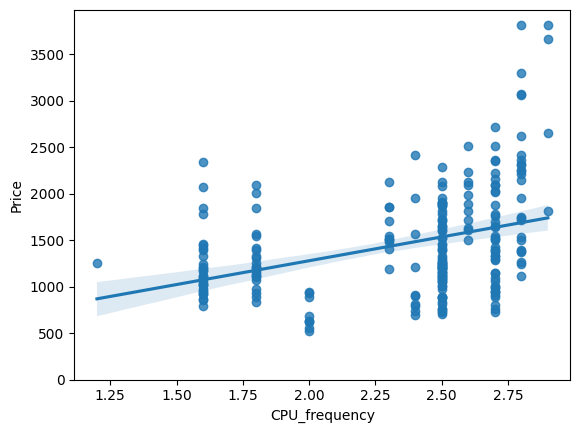

In [ ]:
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,) # set the y-axis limit

(0.0, 3974.15)

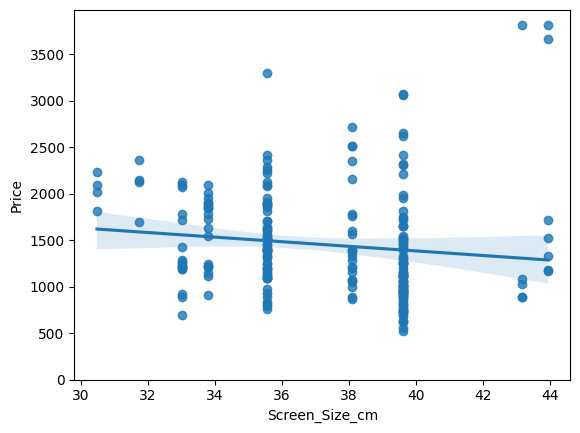

In [10]:
sns.regplot(x="Screen_Size_cm", y="Price", data=df)
plt.ylim(0,) # set the y-axis limit

(0.0, 3974.15)

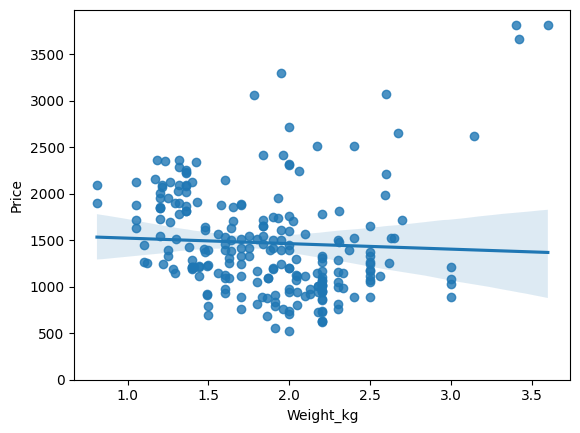

In [12]:
sns.regplot(x="Weight_kg", y="Price", data=df)
plt.ylim(0,) # set the y-axis limit

In [13]:
df[["CPU_frequency", "Screen_Size_cm", "Weight_kg", "Price"]].corr()

,CPU_frequency,Screen_Size_cm,Weight_kg,Price
CPU_frequency,1.000000,-0.002288,0.067409,0.366666
Screen_Size_cm,-0.002288,1.000000,0.825341,-0.128233
Weight_kg,0.067409,0.825341,1.000000,-0.050707
Price,0.366666,-0.128233,-0.050707,1.000000


In [14]:
for param in ['CPU_frequency','Screen_Size_cm','Weight_kg']:
    print('Correlation between Price and',param,':',df[param].corr(df['Price']))

Correlation between Price and CPU_frequency : 0.36666555892588604
Correlation between Price and Screen_Size_cm : -0.12823307934761757
Correlation between Price and Weight_kg : -0.05070733341206661


<Axes: xlabel='Category', ylabel='Price'>

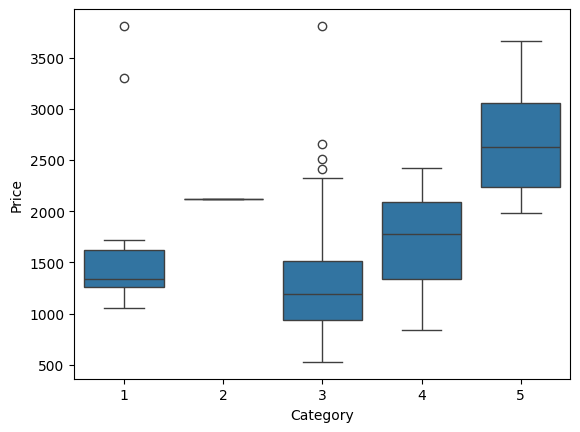

In [15]:
sns.boxplot(x="Category", y="Price", data=df)

<Axes: xlabel='GPU', ylabel='Price'>

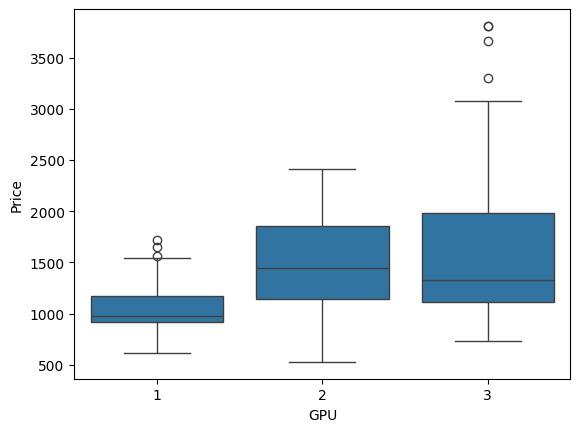

In [16]:
sns.boxplot(x="GPU", y="Price", data=df)

(0.0, 3974.15)

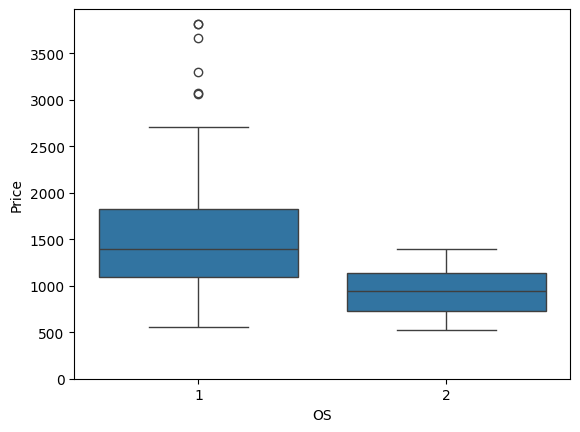

In [17]:
sns.boxplot(x="OS", y="Price", data=df)
plt.ylim(0,)

<Axes: xlabel='CPU_core', ylabel='Price'>

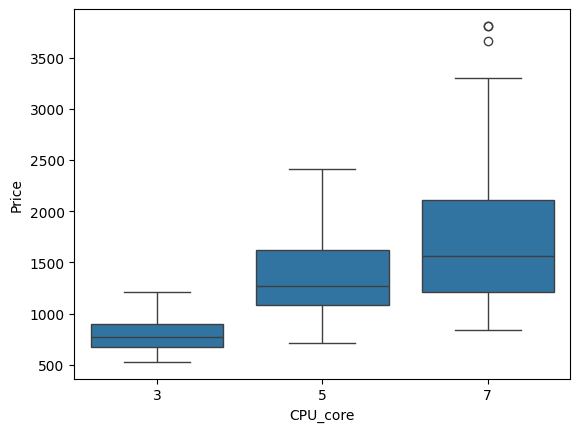

In [18]:
sns.boxplot(x="CPU_core", y="Price", data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

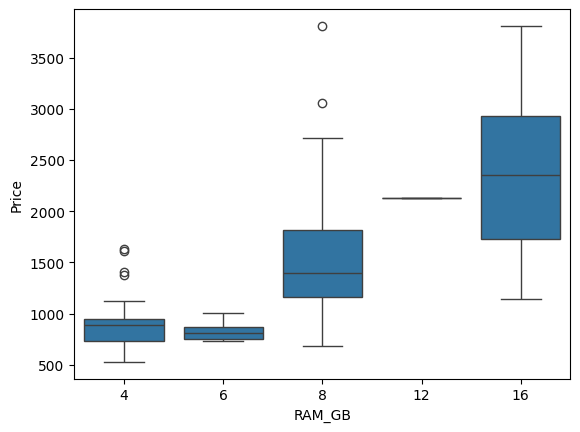

In [19]:
sns.boxplot(x="RAM_GB", y="Price", data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

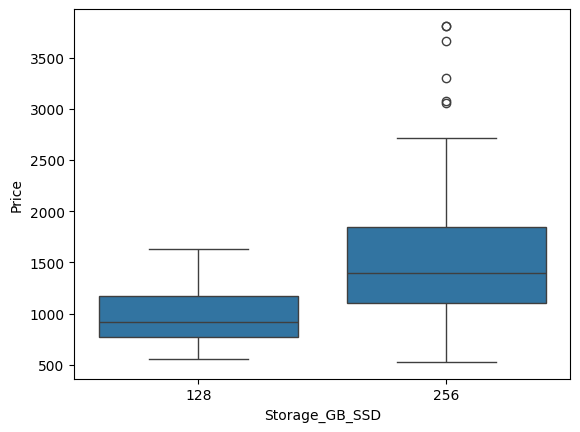

In [20]:
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)

In [21]:
df.describe(include=['object'])

,Manufacturer,Screen
count,238,238
unique,11,2
top,Dell,Full HD
freq,71,161
